In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-game-in-app-purchases-dataset-2025/mobile_game_inapp_purchases.xlsx
/kaggle/input/mobile-game-in-app-purchases-dataset-2025/mobile_game_inapp_purchases.csv
/kaggle/input/mobile-game-in-app-purchases-dataset-2025/mobile_game_inapp_purchases.json
/kaggle/input/mobile-game-purchases/mobile_game_inapp_purchases.csv


# I treated in-app purchases as user interaction events and analyzed engagement patterns over time

In [3]:


#Import dataset
file=pd.read_csv("/kaggle/input/mobile-game-purchases/mobile_game_inapp_purchases.csv" )
file.head()

#EDA
file["LastPurchaseDate"]=pd.to_datetime(file["LastPurchaseDate"])
file.info()
file.describe()

#Checking for null values
file.isna().sum()

# Comparing those who have made a purchase to those who didn't
purchased= file.dropna(subset=['InAppPurchaseAmount'])
nvr_purchased=file.loc[file['InAppPurchaseAmount'].isna()]

#Comparing user gaming behavior by sessionCounts and AverageSessionLength we can 
#see that users who have made a purchase and those who did not do have significant 
#differences in user behavior
purchased.describe()
nvr_purchased.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         3024 non-null   object        
 1   Age                            2964 non-null   float64       
 2   Gender                         2964 non-null   object        
 3   Country                        2964 non-null   object        
 4   Device                         2964 non-null   object        
 5   GameGenre                      2964 non-null   object        
 6   SessionCount                   3024 non-null   int64         
 7   AverageSessionLength           3024 non-null   float64       
 8   SpendingSegment                3024 non-null   object        
 9   InAppPurchaseAmount            2888 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64       
 11  PaymentMethod    

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,LastPurchaseDate
count,129.000000,136.000000,136.000000,0.0,0.0,0
mean,34.441860,10.242647,20.025735,NaN,NaN,NaT
min,13.000000,3.000000,5.260000,NaN,NaN,NaT
25%,23.000000,8.000000,13.077500,NaN,NaN,NaT
50%,34.000000,10.000000,20.025000,NaN,NaN,NaT
75%,47.000000,12.000000,26.805000,NaN,NaN,NaT
max,54.000000,18.000000,34.450000,NaN,NaN,NaT
std,12.621848,2.990098,8.246095,NaN,NaN,NaN


/tmp/ipykernel_55/1495976763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased["days_since_last_purchase"]= (today-purchased["LastPurchaseDate"]).dt.days
/tmp/ipykernel_55/1495976763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased["days_since_last_purchase"]=purchased["days_since_last_purchase"].astype(int)


,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,LastPurchaseDate,days_since_last_purchase
count,2835.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888,2888.000000
mean,33.492416,10.066828,20.076250,102.582864,15.384003,2025-04-24 16:33:14.459833600,250.310249
min,13.000000,1.000000,5.010000,0.000000,0.000000,2025-01-01 00:00:00,140.000000
25%,23.000000,8.000000,12.630000,5.987500,8.000000,2025-02-28 00:00:00,194.000000
50%,33.000000,10.000000,20.325000,11.975000,16.000000,2025-04-26 00:00:00,249.000000
75%,44.000000,12.000000,27.432500,17.762500,23.000000,2025-06-20 00:00:00,306.000000
max,54.000000,22.000000,34.990000,4964.450000,30.000000,2025-08-13 00:00:00,364.000000
std,11.963521,3.121936,8.602216,454.339708,8.946191,NaN,64.713046


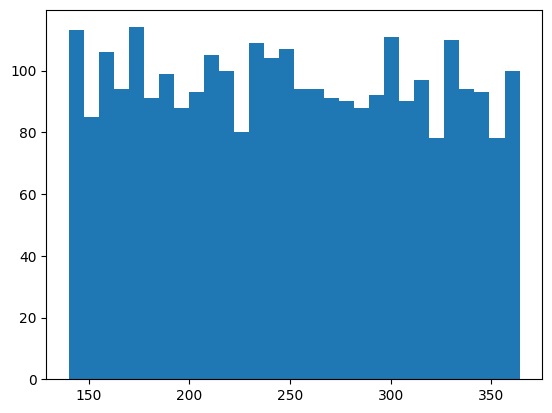

In [5]:
#What does user engagement look like based on recency?

#Parsing last purchase duration
today=pd.to_datetime("31-12-2025",format="%d-%m-%Y")
purchased["days_since_last_purchase"]= (today-purchased["LastPurchaseDate"]).dt.days
purchased["days_since_last_purchase"]=purchased["days_since_last_purchase"].astype(int)

#Checking distributions
plt.hist(purchased["days_since_last_purchase"],bins=30)

#Segmenting into different engagement levels(low,medium,high)
purchased["days_since_last_purchase"].quantile(0.33)
purchased["days_since_last_purchase"].quantile(0.67)

purchased.describe()
#Recency bins
#High engagement:140-218
#Medium:219-288
#Low engagement:288-365


In [6]:
# What genres generate highest revenue based on purchase amount
genre= file.dropna(subset=['GameGenre'])
genre_missing=file.loc[file['GameGenre'].isna()]

#Checking for any significant differences in distribution of user behaviour for null vs nonNA in genre column
genre.describe()
genre_missing.describe()



,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,LastPurchaseDate
count,59.000000,60.000000,60.000000,57.000000,57.000000,57
mean,34.169492,10.450000,18.446667,109.786491,15.350877,2025-04-17 02:06:18.947368448
min,13.000000,4.000000,5.060000,0.160000,0.000000,2025-01-10 00:00:00
25%,25.000000,8.000000,10.737500,6.040000,9.000000,2025-02-25 00:00:00
50%,34.000000,10.000000,16.500000,13.580000,15.000000,2025-04-09 00:00:00
75%,44.500000,13.000000,27.000000,18.820000,23.000000,2025-06-03 00:00:00
max,54.000000,18.000000,34.830000,3382.230000,30.000000,2025-08-10 00:00:00
std,11.775416,3.529176,9.277728,455.364113,8.718804,NaN


In [11]:
#Are there distinct user spending patterns based on session count 
values={"InAppPurchaseAmount":0}

#Imputing null values for those who did not make any purchases
session=file.fillna(value=values)

#
session.describe()

#Determining engagement buckets(Session Count)
#1-8 (bottom 25%)
#8-12 (middle 50%)
#12-22 (top 25%)


,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,LastPurchaseDate
count,2964.000000,3024.000000,3024.000000,3024.000000,2888.000000,2888
mean,33.533738,10.074735,20.073978,97.969349,15.384003,2025-04-24 16:33:14.459833600
min,13.000000,1.000000,5.010000,0.000000,0.000000,2025-01-01 00:00:00
25%,23.000000,8.000000,12.680000,5.120000,8.000000,2025-02-28 00:00:00
50%,33.000000,10.000000,20.315000,11.455000,16.000000,2025-04-26 00:00:00
75%,44.000000,12.000000,27.420000,17.552500,23.000000,2025-06-20 00:00:00
max,54.000000,22.000000,34.990000,4964.450000,30.000000,2025-08-13 00:00:00
std,11.992258,3.115863,8.585208,444.510953,8.946191,NaN
